In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

import data_handling
import utils
from gaussian_spectral_clustering import (compute_pcs_and_project,
                                          initial_class_assignment,
                                          iterate_clustering,
                                          compute_class_statistics,
                                          compute_posterior_probability_and_assign,
                                          compute_multivariate_gaussian_statistics
                                         )
%matplotlib inline

In [2]:
# matplotlib settings for figure size and colormap
plt.rcParams['figure.figsize'] = [20, 15];
plt.rcParams['image.cmap'] = plt.gray();

<Figure size 1440x1080 with 0 Axes>

In [3]:
hsi_data_mat, sz, truth_data_mat = data_handling.load_aviris_data('sample-data-master/92AV3C.lan')

## Compute PCs and Project

In [4]:
x_pca, eig_vecs = compute_pcs_and_project(hsi_data_mat)

In [5]:
def reshape_pca_band(X, band, sz):
    nl, ns, nb = sz
    # return X.transpose().reshape([nl, ns, nb], order='F')[:, :, band]
    return X[band, :].reshape([nl, ns], order='F')

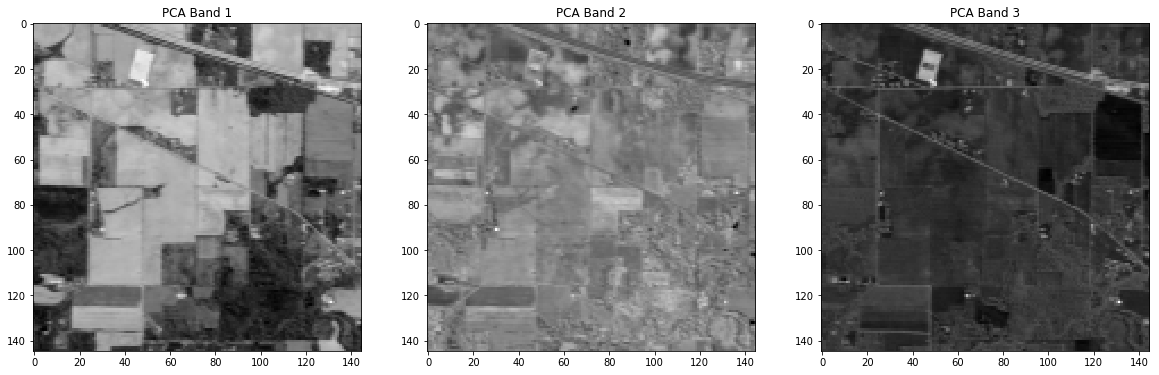

In [6]:
# Plot various bands from the image
# Squeeze() is needed to remove the single-dimensional band dimension
# before plotting (e.g. (nl, ns, 1) -> (nl, ns))
f, (plot1, plot2, plot3) = plt.subplots(1, 3)
plot1.imshow(reshape_pca_band(x_pca, 0, sz), cmap=plt.gray());
plot1.set_title('PCA Band 1');

plot2.imshow(reshape_pca_band(x_pca, 1, sz), cmap=plt.gray());
plot2.set_title('PCA Band 2');

plot3.imshow(reshape_pca_band(x_pca, 2, sz), cmap=plt.gray());
plot3.set_title('PCA Band 3');


## Split data into leading and trailing-order PCs

In [7]:
# Number of leading order PCs (i.e. bands [0, K])
K = 10

leading_order_pcs = x_pca[:K, :]
trailing_order_pcs = x_pca[K:, :]

## (Optional) Cull Pixels

In [8]:
outlier_ixs, valid_ixs = compute_multivariate_gaussian_statistics(trailing_order_pcs)
print('Number of outliers: {}'.format(outlier_ixs.shape))

Number of outliers: (31,)


In [9]:
leading_order_pcs_masked = leading_order_pcs[:, valid_ixs]

## Initial Class Assignment (leading-order PCs)

In [10]:
num_classes = 7

In [11]:
np.random.seed(12345)
cmi, cm, cc = initial_class_assignment(leading_order_pcs, num_classes)

In [12]:
cmi_masked, cm_masked, cc_masked = initial_class_assignment(leading_order_pcs_masked, num_classes)

In [13]:
#%%timeit
final_class_ixs = iterate_clustering(leading_order_pcs, cmi, num_classes, 300)

class counts [2931 3039 3061 3036 2882 3109 2967]
Finished iteration # 0
class counts [3031 2539 3467 3416 2414 3413 2745]
Finished iteration # 1
class counts [3080 2204 4224 3936 1829 3421 2331]
Finished iteration # 2
class counts [3020 2152 5311 3680 1395 3515 1952]
Finished iteration # 3
class counts [3351 1928 6473 2243 1320 3831 1879]
Finished iteration # 4
class counts [4013 1757 7205 1159 1401 3586 1904]
Finished iteration # 5
class counts [4496 1632 7306  889 1578 3104 2020]
Finished iteration # 6
class counts [4731 1576 7297  843 1761 2732 2085]
Finished iteration # 7
class counts [4796 1512 7239  897 1927 2615 2039]
Finished iteration # 8
class counts [4701 1451 7137 1090 2140 2540 1966]
Finished iteration # 9
class counts [4622 1396 7025 1287 2378 2401 1916]
Finished iteration # 10
class counts [4538 1337 6923 1471 2592 2310 1854]
Finished iteration # 11
class counts [4423 1316 6815 1647 2766 2244 1814]
Finished iteration # 12
class counts [4310 1331 6697 1761 2960 2138 1828

class counts [3606 2616 3879 3962 3834 1379 1749]
Finished iteration # 116
class counts [3612 2601 3900 3961 3820 1366 1765]
Finished iteration # 117
class counts [3585 2607 3857 3994 3872 1372 1738]
Finished iteration # 118
class counts [3609 2581 3874 3989 3865 1375 1732]
Finished iteration # 119
class counts [3600 2548 3875 3995 3869 1378 1760]
Finished iteration # 120
class counts [3603 2576 3890 3984 3843 1382 1747]
Finished iteration # 121
class counts [3614 2584 3880 3989 3821 1395 1742]
Finished iteration # 122
class counts [3612 2604 3888 3962 3799 1406 1754]
Finished iteration # 123
class counts [3624 2602 3886 3977 3804 1410 1722]
Finished iteration # 124
class counts [3619 2627 3873 4001 3799 1392 1714]
Finished iteration # 125
class counts [3611 2609 3848 4018 3832 1406 1701]
Finished iteration # 126
class counts [3603 2644 3845 4001 3824 1395 1713]
Finished iteration # 127
class counts [3596 2652 3820 4029 3777 1421 1730]
Finished iteration # 128
class counts [3585 2605 3

class counts [3576 2688 3867 4001 3787 1403 1703]
Finished iteration # 227
class counts [3565 2672 3858 4009 3796 1410 1715]
Finished iteration # 228
class counts [3580 2661 3845 4015 3820 1411 1693]
Finished iteration # 229
class counts [3573 2680 3815 4042 3827 1421 1667]
Finished iteration # 230
class counts [3589 2677 3805 4036 3812 1435 1671]
Finished iteration # 231
class counts [3563 2666 3807 4044 3827 1441 1677]
Finished iteration # 232
class counts [3595 2671 3803 4054 3785 1443 1674]
Finished iteration # 233
class counts [3618 2693 3812 4048 3729 1428 1697]
Finished iteration # 234
class counts [3617 2662 3821 4059 3777 1410 1679]
Finished iteration # 235
class counts [3634 2685 3829 4018 3771 1426 1662]
Finished iteration # 236
class counts [3655 2679 3819 4038 3720 1426 1688]
Finished iteration # 237
class counts [3624 2652 3831 4018 3816 1411 1673]
Finished iteration # 238
class counts [3628 2655 3785 4061 3783 1415 1698]
Finished iteration # 239
class counts [3608 2639 3

In [14]:
final_class_ixs_masked = iterate_clustering(leading_order_pcs_masked, cmi_masked, num_classes, 300, dead_class_threshold=10)

class counts [2975 3063 2887 3031 3102 2971 2965]
Finished iteration # 0
class counts [2927 3240 3064 2965 2613 2766 3419]
Finished iteration # 1
class counts [2977 3958 3050 2648 2192 2405 3764]
Finished iteration # 2
class counts [2829 5321 2765 1914 1962 1765 4438]
Finished iteration # 3
class counts [2246 6121 2488 1635 1860 1572 5072]
Finished iteration # 4
class counts [1825 6446 2379 1661 1851 1717 5115]
Finished iteration # 5
class counts [1741 6490 2395 1787 1866 1750 4965]
Finished iteration # 6
class counts [1830 6428 2412 1885 1841 1787 4811]
Finished iteration # 7
class counts [1893 6383 2431 1957 1827 1850 4653]
Finished iteration # 8
class counts [1984 6320 2416 1952 1791 1961 4570]
Finished iteration # 9
class counts [2112 6236 2385 1942 1759 2098 4462]
Finished iteration # 10
class counts [2219 6148 2415 1911 1675 2301 4325]
Finished iteration # 11
class counts [2305 6063 2430 1870 1622 2502 4202]
Finished iteration # 12
class counts [2402 5983 2459 1833 1604 2617 4096

class counts [3774 3844 3372 1797 1843 3523 2841]
Finished iteration # 113
class counts [3802 3825 3358 1781 1833 3540 2855]
Finished iteration # 114
class counts [3797 3854 3375 1803 1799 3484 2882]
Finished iteration # 115
class counts [3819 3827 3382 1808 1795 3475 2888]
Finished iteration # 116
class counts [3778 3852 3390 1819 1823 3502 2830]
Finished iteration # 117
class counts [3813 3825 3380 1834 1818 3475 2849]
Finished iteration # 118
class counts [3794 3841 3377 1833 1810 3515 2824]
Finished iteration # 119
class counts [3803 3833 3373 1831 1842 3485 2827]
Finished iteration # 120
class counts [3856 3792 3378 1824 1844 3477 2823]
Finished iteration # 121
class counts [3864 3760 3365 1815 1881 3458 2851]
Finished iteration # 122
class counts [3862 3768 3358 1819 1861 3497 2829]
Finished iteration # 123
class counts [3888 3737 3385 1811 1868 3495 2810]
Finished iteration # 124
class counts [3897 3738 3376 1840 1858 3454 2831]
Finished iteration # 125
class counts [3862 3750 3

class counts [3845 3833 3370 1719 2141 3418 2668]
Finished iteration # 224
class counts [3840 3844 3378 1704 2151 3419 2658]
Finished iteration # 225
class counts [3843 3853 3390 1686 2140 3430 2652]
Finished iteration # 226
class counts [3850 3845 3385 1700 2145 3421 2648]
Finished iteration # 227
class counts [3875 3826 3389 1683 2142 3435 2644]
Finished iteration # 228
class counts [3887 3832 3389 1692 2129 3465 2600]
Finished iteration # 229
class counts [3914 3800 3372 1686 2115 3458 2649]
Finished iteration # 230
class counts [3871 3835 3356 1682 2103 3534 2613]
Finished iteration # 231
class counts [3868 3826 3371 1700 2141 3484 2604]
Finished iteration # 232
class counts [3879 3815 3374 1691 2129 3489 2617]
Finished iteration # 233
class counts [3838 3851 3377 1691 2132 3462 2643]
Finished iteration # 234
class counts [3880 3813 3384 1683 2145 3512 2577]
Finished iteration # 235
class counts [3870 3821 3410 1697 2155 3477 2564]
Finished iteration # 236
class counts [3891 3814 3

In [15]:
# Code taken from https://github.com/bids/colormap/blob/master/parula.py to create the Parula colormap
# Parula is MATLAB's default and is being used to better compare this Python code to the MATLAB results given
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

plt.register_cmap(cmap=parula_map)
cmap = plt.get_cmap('parula')

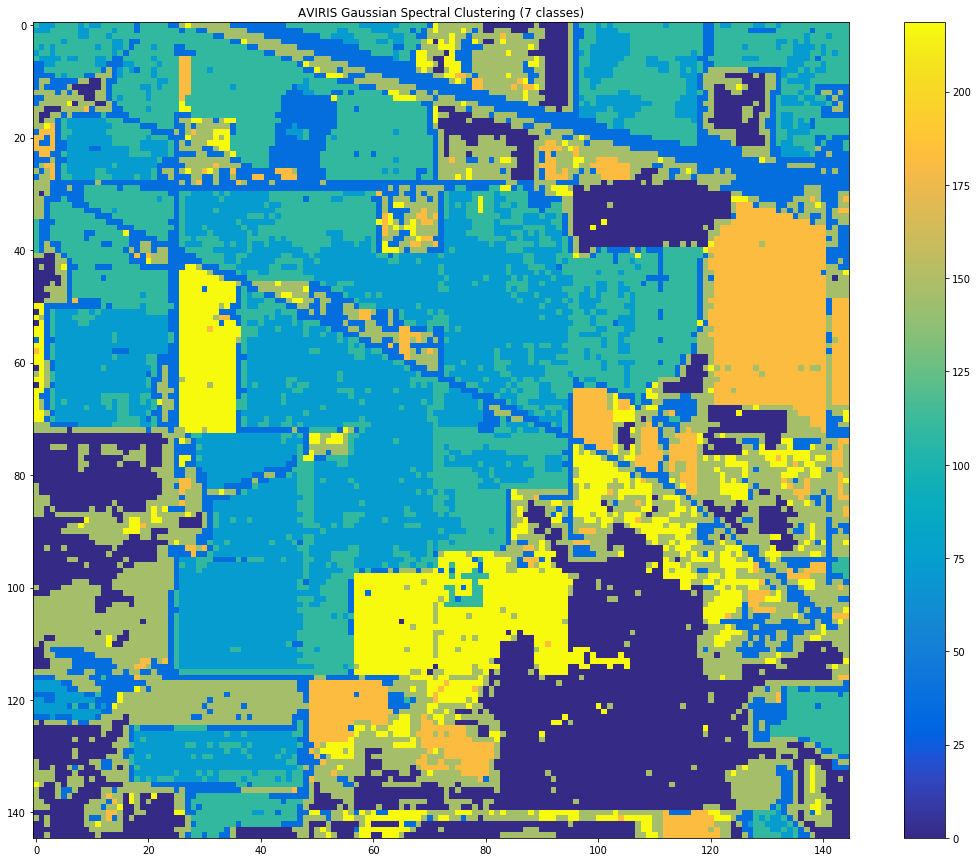

In [16]:
# Plot non-culled GSC output
nl, ns, nb = sz
fig, axs = plt.subplots(nrows=1, ncols=1);
cmap = plt.get_cmap('parula')

im = axs.imshow((final_class_ixs.reshape([nl, ns], order='F') * 255/num_classes), cmap=cmap);
axs.set_title('AVIRIS Gaussian Spectral Clustering ({} classes)'.format(num_classes))

fig.colorbar(im, ax=axs);

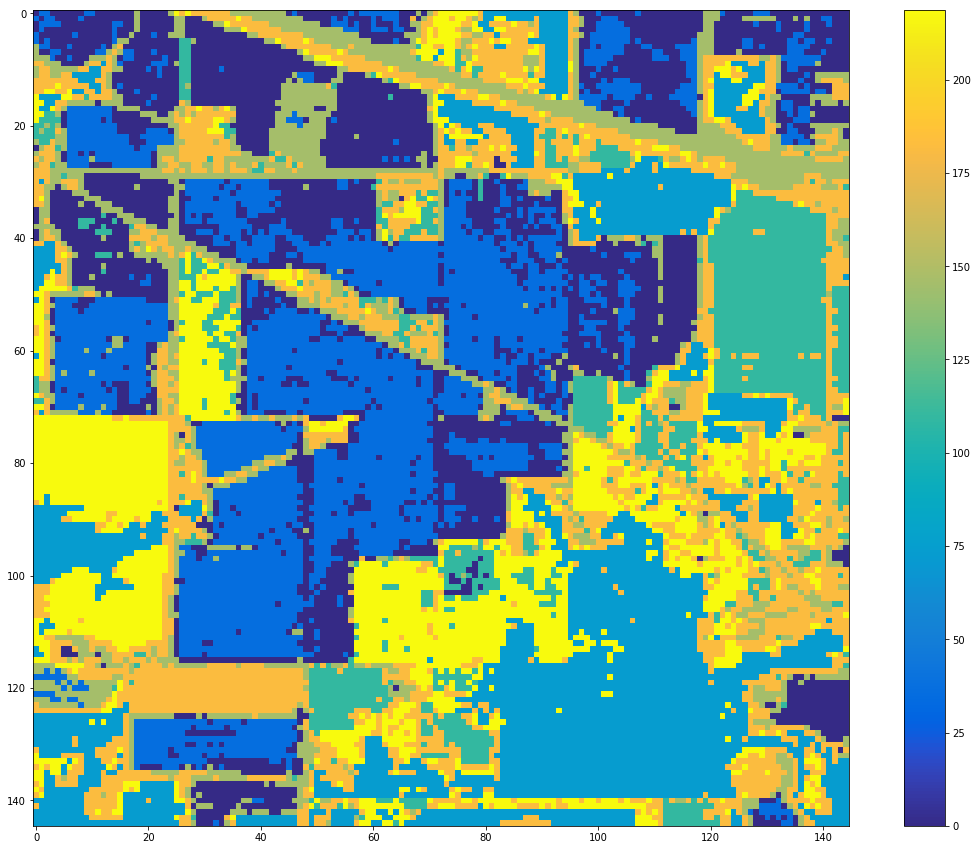

In [17]:
# Plot culled GSC output
tmp = np.zeros([nl*ns])
tmp[valid_ixs] = final_class_ixs_masked
nl, ns, nb = sz
fig, axs = plt.subplots(nrows=1, ncols=1);
cmap = plt.get_cmap('parula')

im = axs.imshow((tmp.reshape([nl, ns], order='F') * 255/num_classes), cmap=cmap);

fig.colorbar(im, ax=axs);

## Now do K-means and compare

In [18]:
#%%timeit
km = KMeans(n_clusters=num_classes, random_state=12345).fit(hsi_data_mat.transpose())

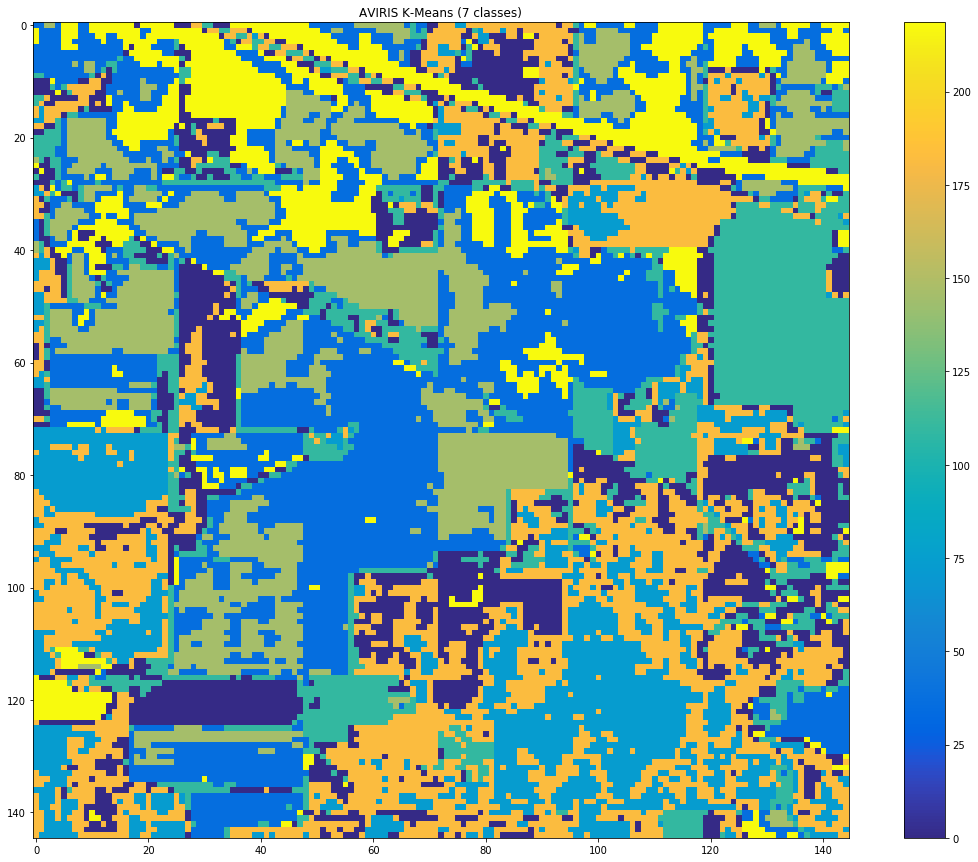

In [19]:
# Plot k-means results
nl, ns, nb = sz
fig, axs = plt.subplots(nrows=1, ncols=1);
cmap = plt.get_cmap('parula')

im = axs.imshow(km.labels_.reshape([nl, ns], order='F') * 255/num_classes, cmap=cmap);
axs.set_title('AVIRIS K-Means ({} classes)'.format(num_classes))
fig.colorbar(im, ax=axs);

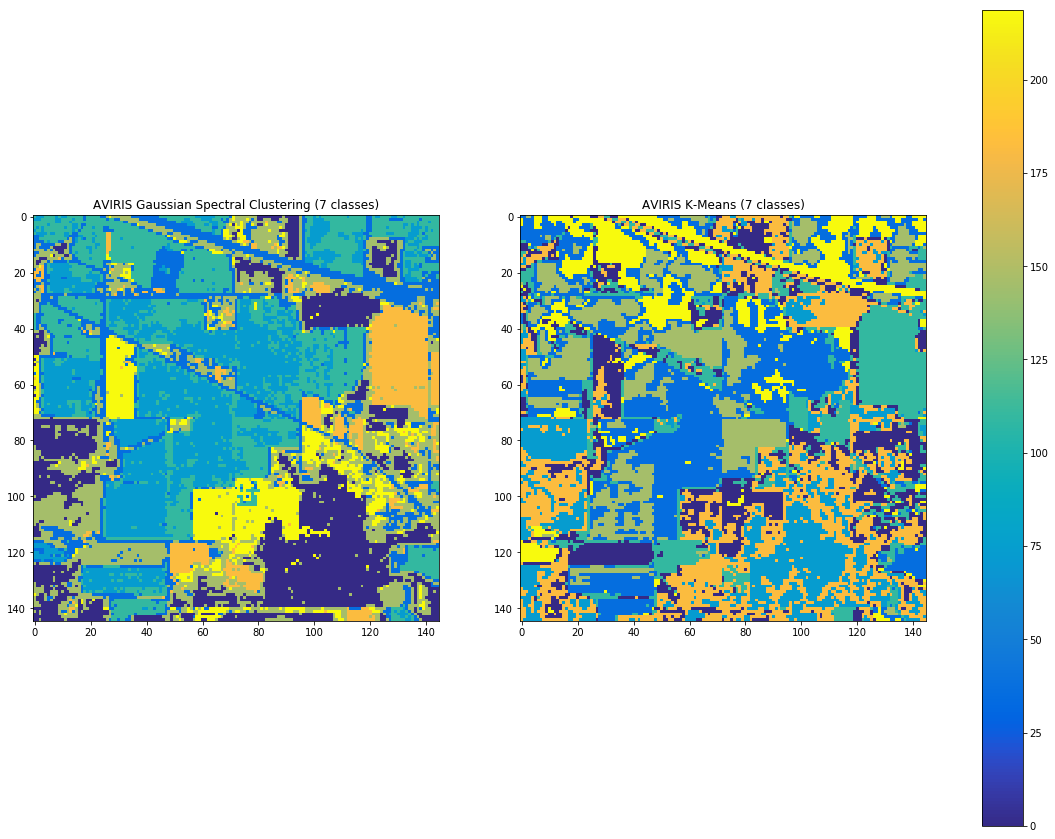

In [20]:
# Side by side comparison
fig, axs = plt.subplots(nrows=1, ncols=2);
cmap = plt.get_cmap('parula')

gsc_im = axs[0].imshow((final_class_ixs.reshape([nl, ns], order='F') * 255/num_classes), cmap=cmap);
km_im = axs[1].imshow((km.labels_.reshape([nl, ns], order='F') * 255/num_classes), cmap=cmap);

axs[0].set_title('AVIRIS Gaussian Spectral Clustering ({} classes)'.format(num_classes))
axs[1].set_title('AVIRIS K-Means ({} classes)'.format(num_classes))

fig.colorbar(gsc_im, ax=axs);